<a href="https://colab.research.google.com/github/Lahasyakr/cs666student/blob/main/LEARN_CURVEt_cs638.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
from sklearn.compose import ColumnTransformer #data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing
from sklearn.impute import KNNImputer #handle missing values
from sklearn.model_selection import train_test_split #train/test dataset

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score #evaluate model
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import roc_curve, auc, RocCurveDisplay,ConfusionMatrixDisplay

In [145]:
name = ['Class','age', 'sex','haemoglobin','platelets','WBC', 'serum-albumin','serum-globulin','total-protein','serum-cholesterol','serum-triglycerides']

In [146]:
data = pd.read_csv('burn_data_final.data', names = name)

In [149]:
data[80:104]

,Class,age,sex,haemoglobin,platelets,WBC,serum-albumin,serum-globulin,total-protein,serum-cholesterol,serum-triglycerides
80,0,57,0,11.4,1.80,2800,1.7,1.82,3.50,108,109
81,1,35,1,12.8,1.70,9600,2.6,2.45,4.88,118,47
82,1,31,1,10.3,3.12,8450,2.5,2.60,4.89,120,48
83,1,30,0,10.6,2.60,5100,3.0,2.50,4.92,120,50
84,1,40,0,11.0,2.40,5700,2.5,2.40,4.90,122,62
85,1,36,1,12.2,1.50,6500,2.7,2.50,5.00,118,49
86,1,41,0,11.6,1.60,9800,2.6,2.30,5.10,124,52
87,1,42,1,11.2,1.80,6500,2.5,2.60,4.95,116,54
88,1,25,0,9.8,1.70,6400,2.4,2.70,4.92,120,56
89,1,21,1,10.6,2.00,3900,3.0,2.50,4.96,118,52


## **DATA ANALYSIS**

<Axes: xlabel='sex', ylabel='count'>

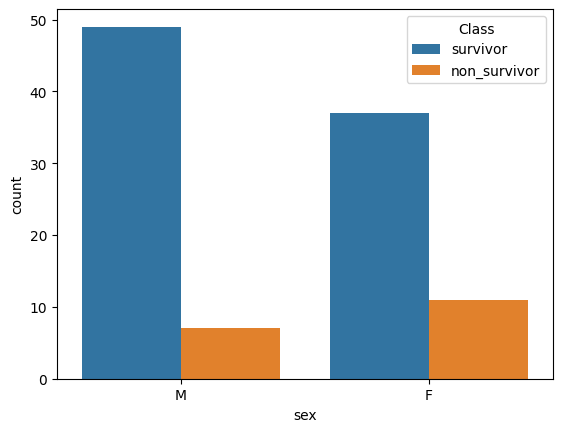

In [ ]:
sns.countplot(data= data, x='sex', hue='Class')

<Axes: xlabel='Class', ylabel='haemoglobin'>

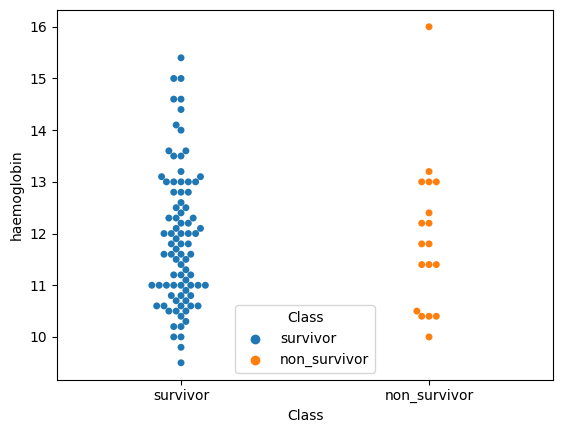

In [ ]:
sns.swarmplot(data=data, x='Class', y='haemoglobin', hue='Class')

<Axes: xlabel='Class', ylabel='WBC'>

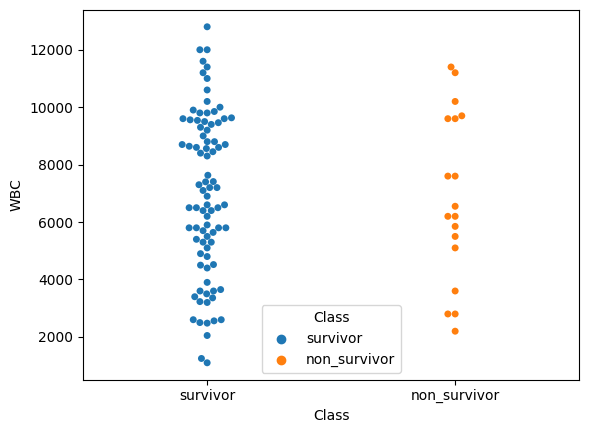

In [ ]:
sns.swarmplot(data=data, x='Class', y='WBC', hue='Class')

<Axes: xlabel='Class', ylabel='platelets'>

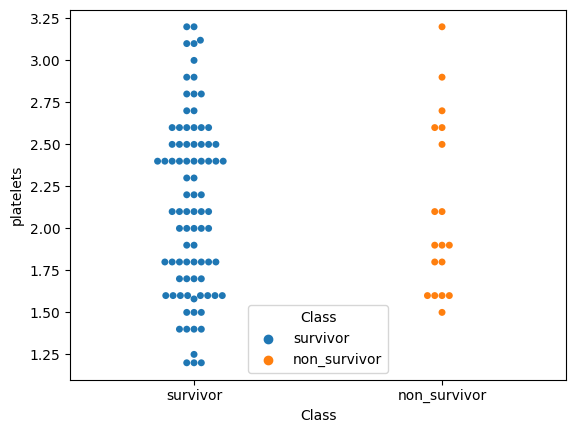

In [ ]:
sns.swarmplot(data=data, x='Class', y='platelets', hue='Class')

<Axes: xlabel='Class', ylabel='serum-globulin'>

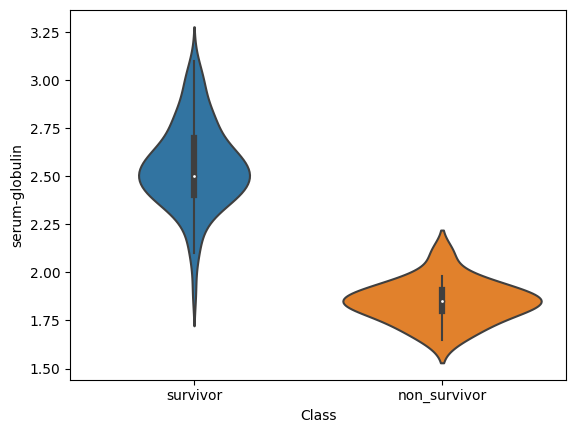

In [ ]:
sns.violinplot(data=data, x='Class', y='serum-globulin')

<Axes: xlabel='Class', ylabel='serum-globulin'>

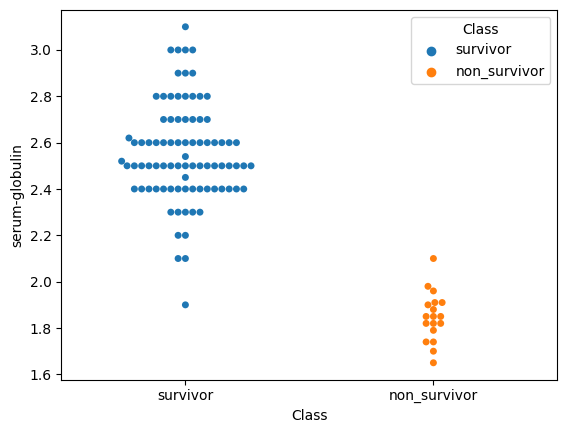

In [ ]:
sns.swarmplot(data=data, x='Class',y='serum-globulin', hue='Class')

<Axes: xlabel='Class', ylabel='serum-albumin'>

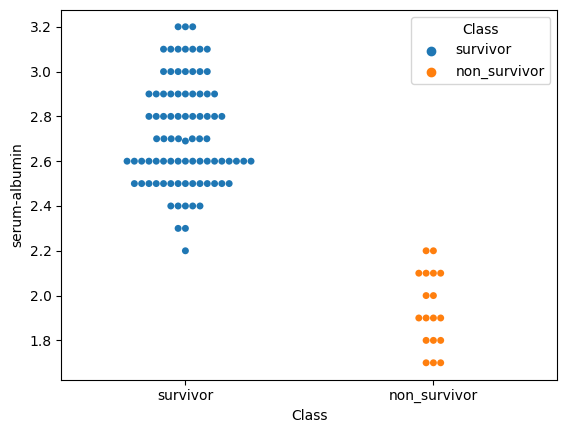

In [ ]:
sns.swarmplot(data=data, x='Class',y='serum-albumin', hue='Class')

<Axes: xlabel='Class', ylabel='serum-cholesterol'>

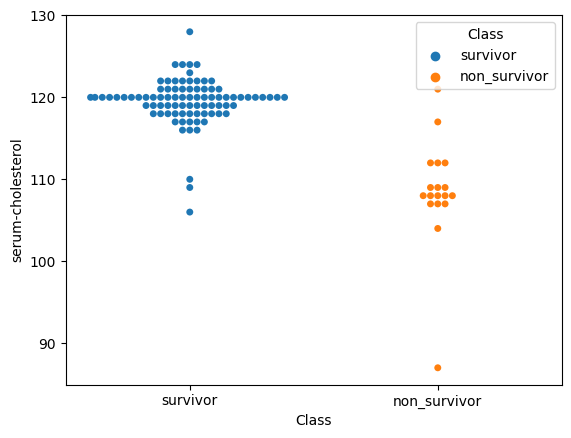

In [ ]:
sns.swarmplot(data=data, x='Class',y='serum-cholesterol', hue='Class')

<Axes: xlabel='serum-cholesterol', ylabel='serum-albumin'>

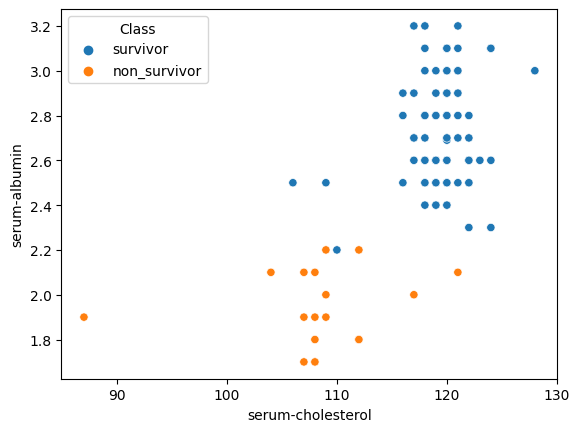

In [ ]:
sns.scatterplot(data=data, x='serum-cholesterol', y='serum-albumin', hue='Class')

<Axes: xlabel='Class', ylabel='serum-triglycerides'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


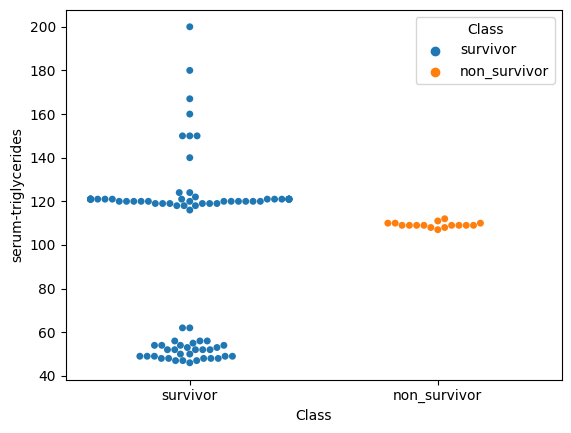

In [ ]:
sns.swarmplot(data=data, x='Class', y='serum-triglycerides', hue='Class')

Based on the above data analysis, we will be considering foloowing features for our model -


1.  age
2.  sex
3. serum-albumin
4. serum-globulin
5. total-protein
6. serum-cholesterol
7. serum-triglycerides



# **DATA PREPROCESSING**

In [ ]:
from sklearn import preprocessing
data =data.apply(preprocessing.LabelEncoder().fit_transform)
data.head()

,Class,age,sex,haemoglobin,platelets,WBC,serum-albumin,serum-globulin,total-protein,serum-cholesterol,serum-triglycerides
0,1,11,1,24,7,66,12,19,25,12,21
1,1,17,0,21,11,52,6,21,26,16,19
2,1,9,1,17,5,48,9,24,11,15,20
3,1,0,0,2,0,25,16,22,15,10,18
4,1,7,1,28,14,14,9,16,12,14,25


<Axes: >

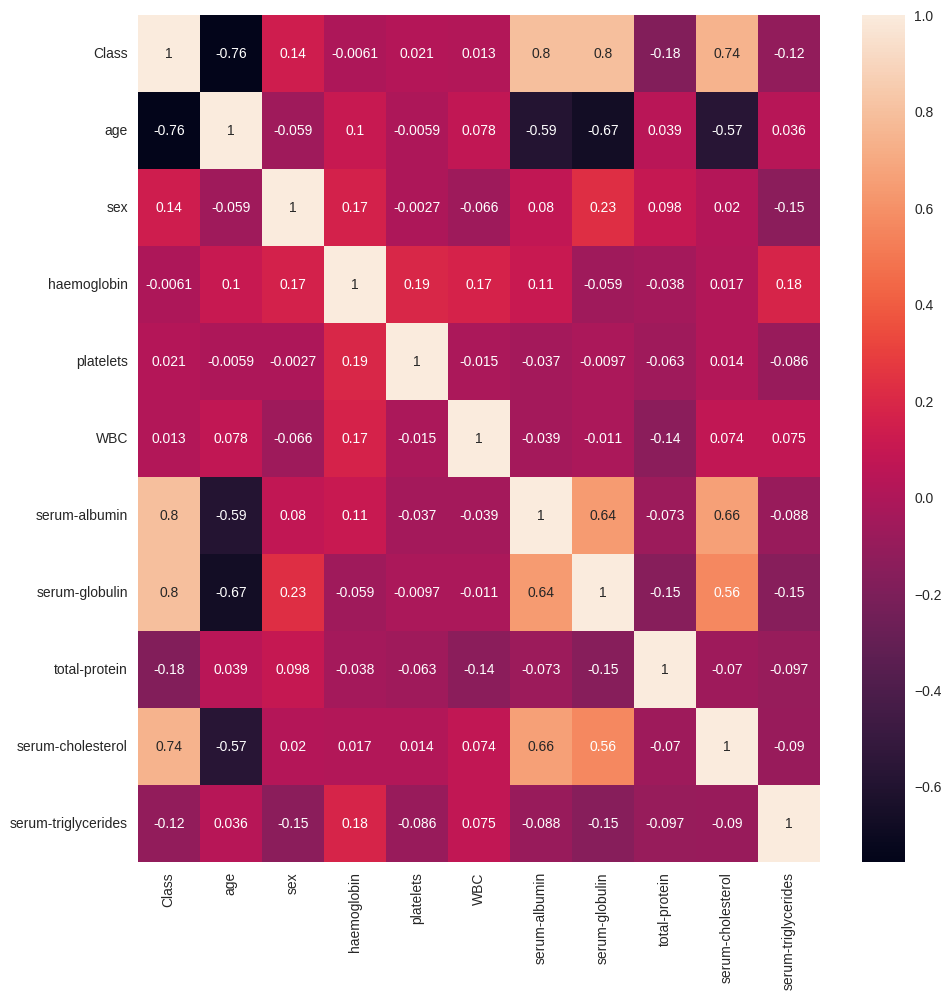

In [116]:
fig = plt.figure(figsize=(11,11))
sns.heatmap(data.corr(),annot=True)

In [150]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
X

array([[ 0.45749571, -0.53341323,  0.9258201 , ...,  0.94417695,
         0.4264055 ,  0.594938  ],
       [ 0.45749571,  0.07397702, -1.08012345, ...,  1.17058783,
         1.1387938 ,  0.53876592],
       [ 0.45749571, -0.73587665,  0.9258201 , ...,  0.03853339,
         0.96069672,  0.56685196],
       ...,
       [ 0.45749571,  0.58013556,  0.9258201 , ...,  0.31022646,
         0.4264055 , -1.51151521],
       [ 0.45749571, -0.73587665,  0.9258201 , ...,  0.49135517,
         0.60450257, -1.45534313],
       [-2.18581284,  1.89614776,  0.9258201 , ..., -2.08972896,
         0.60450257,  0.25790549]])

In [151]:
X = data[['age','sex','haemoglobin','platelets','WBC', 'serum-albumin','serum-globulin','total-protein','serum-cholesterol','serum-triglycerides']]
y = data['Class']


In [152]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state = 50)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,test_size = 0.45, random_state = 50)

# **Handling data imbalance**
using Synthetic Minority Oversampling Technique, or SMOTE
applying SMOTE only on the training set and the test and validation set are unchanged

In [153]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("x val: ",x_val.shape)

print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("y val: ",y_val.shape)

x train:  (52, 10)
x test:  (28, 10)
x val:  (24, 10)
y train:  (52,)
y test:  (28,)
y val:  (24,)


# **LOGISTIC REGRESSION**

In [154]:
# Defining logistic regression
survival_classifier = LogisticRegression(C=0.01)

In [201]:
survival_classifier.fit(x_train, y_train)
y_pred = survival_classifier.predict(x_test)
y_pred_val = survival_classifier.predict(x_val)

In [156]:
#evaluating the model
print(classification_report(y_test, y_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.96      1.00      0.98        22

    accuracy                           0.96        28
   macro avg       0.98      0.92      0.94        28
weighted avg       0.97      0.96      0.96        28

Test Accuracy:  0.9642857142857143
Val Accuracy:  0.875


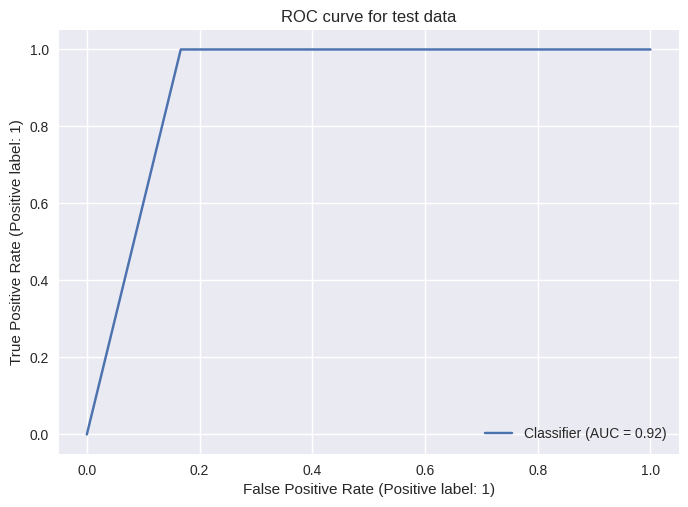

In [202]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title('ROC curve for test data')
plt.show()

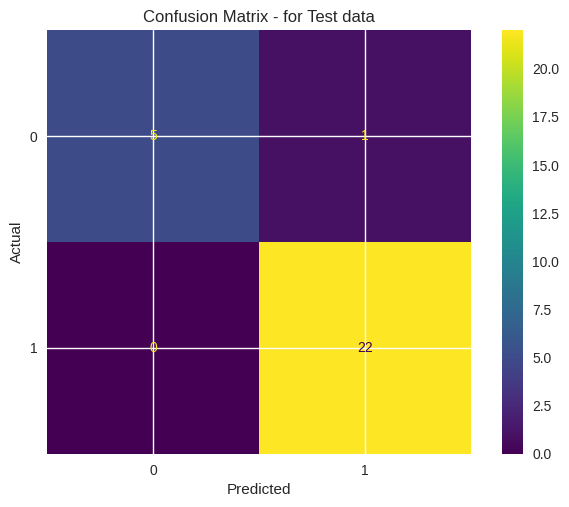

In [203]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Test data')
plt.show()

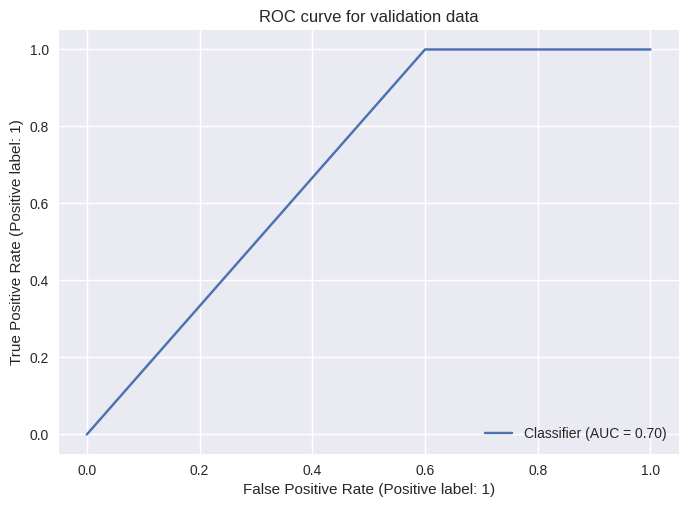

In [204]:
RocCurveDisplay.from_predictions(y_val, y_pred_val)
plt.title('ROC curve for validation data')
plt.show()

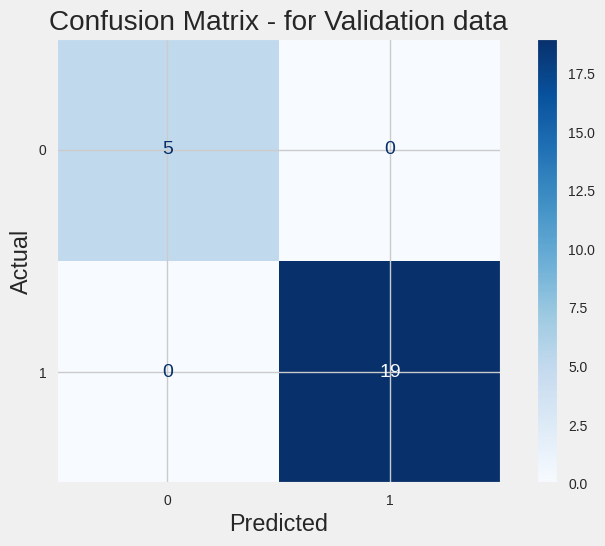

In [249]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_val,y_pred_val, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Validation data')
plt.show()

['10000.0', '1000.0', '100.0', '10.0', '1.0', '0.1', '0.01', '0.001']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

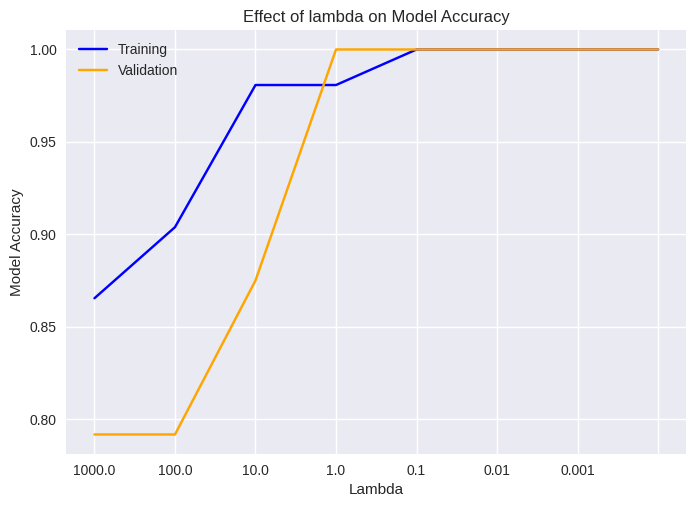

In [210]:
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
# C_values= np.linspace(0.01,10,100)
lambda_ = [str(1/i) for i in C_values]
print(lambda_)
train_acc, val_acc, test_acc = [], [], []

for c in C_values:
    # where lambda = 1/c
    r_c = LogisticRegression(C = c, random_state = 1)
    r_c.fit(x_train,y_train)


    y_pred_train = r_c.predict(x_train)
    y_pred_valid = r_c.predict(x_val)
    y_pred_test = r_c.predict(x_test)

    # accuracy
    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_val, y_pred_valid))
    test_acc.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.xlabel("Lambda")
plt.ylabel("Model Accuracy")
plt.plot(np.array(train_acc), color='blue', label='Training')
plt.plot(np.array(val_acc), color='orange', label='Validation')


plt.legend()
ax.set_xticklabels(lambda_)
plt.title('Effect of lambda on Model Accuracy')
plt.show()

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.21428571428571427,
  0.14285714285714285,
  0.17857142857142858,
  0.17857142857142858,
  0.17857142857142858,
  0.07142857142857142,
  0.07142857142857142,
  0.03571428571428571,
  0.03571428571428571,
  0.03571428571428571])

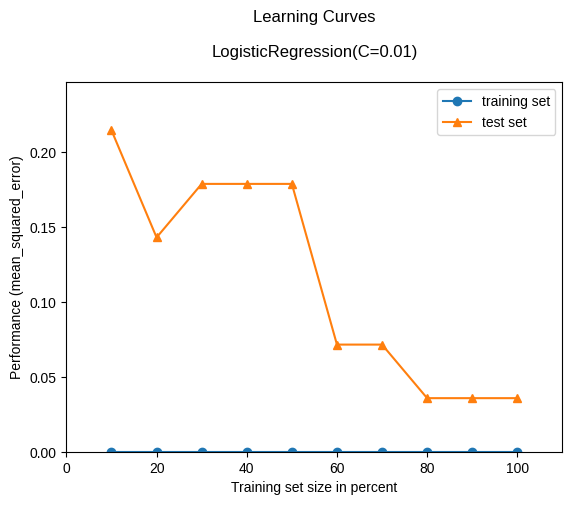

In [254]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train, x_test, y_test, survival_classifier, scoring='mean_squared_error')


In [236]:
 from sklearn.metrics import mean_squared_error
 mean_squared_error(y_test,y_pred)

0.03571428571428571

training error: 0.000 test error: 0.179 subset size: 20.000
training error: 0.000 test error: 0.179 subset size: 21.000
training error: 0.000 test error: 0.179 subset size: 22.000
training error: 0.000 test error: 0.179 subset size: 23.000
training error: 0.000 test error: 0.179 subset size: 24.000
training error: 0.000 test error: 0.179 subset size: 25.000
training error: 0.000 test error: 0.179 subset size: 27.000
training error: 0.000 test error: 0.071 subset size: 28.000
training error: 0.000 test error: 0.071 subset size: 29.000
training error: 0.000 test error: 0.071 subset size: 31.000
training error: 0.000 test error: 0.071 subset size: 33.000
training error: 0.000 test error: 0.071 subset size: 34.000
training error: 0.000 test error: 0.071 subset size: 36.000
training error: 0.000 test error: 0.071 subset size: 38.000
training error: 0.000 test error: 0.071 subset size: 40.000
training error: 0.000 test error: 0.036 subset size: 42.000
training error: 0.000 test error: 0.036 

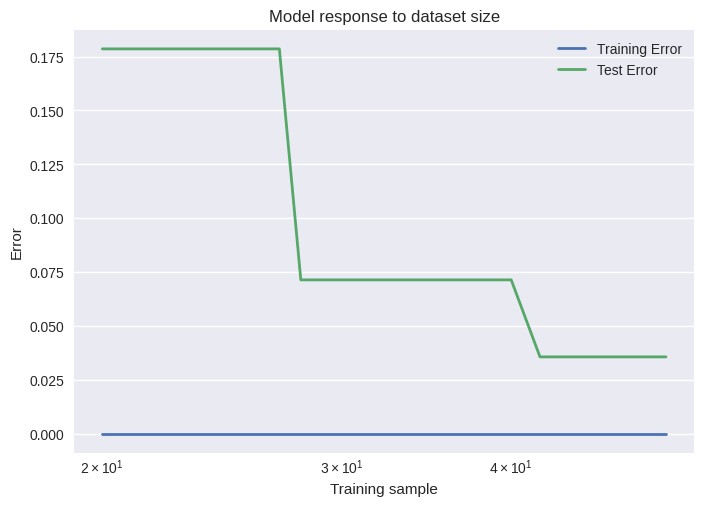

In [238]:
def data_size_response(model,trX,teX,trY,teY,score_func,prob=True,n_subsets=20):

    train_errs,test_errs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)

    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        if prob:
            train_err = score_func(trY[:m],model.predict_proba(trX[:m]))
            test_err = score_func(teY,model.predict_proba(teX))
        else:
            train_err = score_func(trY[:m],model.predict(trX[:m]))
            test_err = score_func(teY,model.predict(teX))
        print ("training error: %.3f test error: %.3f subset size: %.3f" % (train_err,test_err,m))
        train_errs.append(train_err)
        test_errs.append(test_err)

    return subset_sizes,train_errs,test_errs

def plot_response(subset_sizes,train_errs,test_errs):

    plt.plot(subset_sizes,train_errs,lw=2)
    plt.plot(subset_sizes,test_errs,lw=2)
    plt.legend(['Training Error','Test Error'])
    plt.xscale('log')
    plt.xlabel('Training sample')
    plt.ylabel('Error')
    plt.title('Model response to dataset size')
    plt.show()



def score_function(y_act, y_prediction):
    return mean_squared_error(y_act,y_prediction)
score_func = score_function
response = data_size_response(survival_classifier,x_train,x_test,y_train,y_test,score_func,prob=False)
plot_response(*response)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

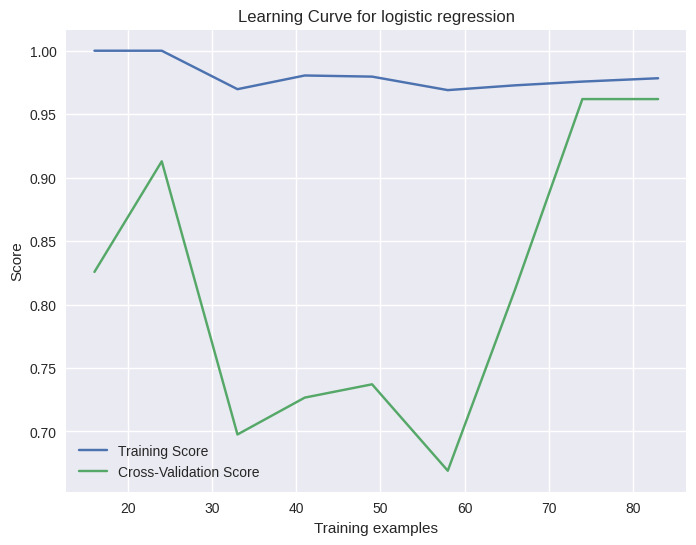

In [164]:
train_sizes, train_scores, test_scores = learning_curve(survival_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for logistic regression')
plt.legend(loc='best')
plt.show()

K-fold cross-validaiton for hypterparameter selection

In [165]:
grid_select={"C":[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}

search_cv = GridSearchCV(survival_classifier, param_grid=grid_select, cv=7, scoring='accuracy', verbose=True, n_jobs=-1)

best_clf = search_cv.fit(x_val, y_val)

Fitting 7 folds for each of 8 candidates, totalling 56 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(


In [166]:
# Best hyperparameter
print("Best hpyerparameters :(best parameters) ",best_clf.best_params_)
print("accuracy :", best_clf.best_score_)

Best hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 1.0


# **Classification using SVM**

In [168]:
from sklearn.svm import SVC
from sklearn import svm

In [169]:
svm_model  = svm.SVC()
svm_model.fit(x_train, y_train)
pred_y = svm_model.predict(x_test)
pred_y_val = svm_model.predict(x_val)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.79      1.00      0.88        22

    accuracy                           0.79        28
   macro avg       0.39      0.50      0.44        28
weighted avg       0.62      0.79      0.69        28



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
print('test_acc ',accuracy_score(y_test, pred_y))
print('val acc', accuracy_score(y_val, pred_y_val))

test_acc  0.7857142857142857
val acc 0.7916666666666666


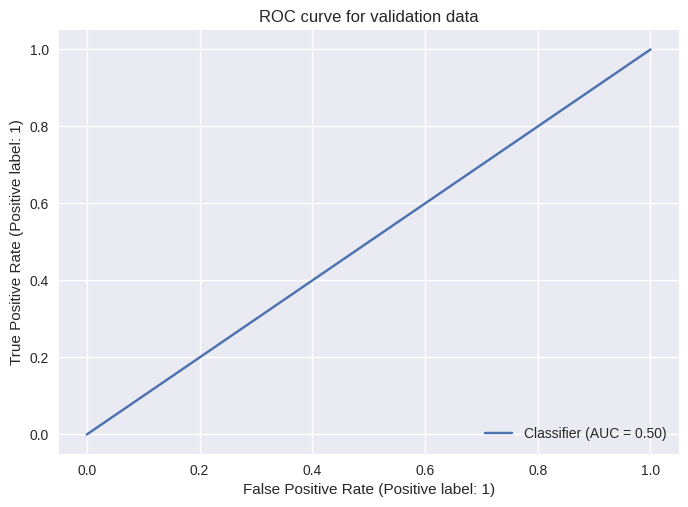

In [171]:
RocCurveDisplay.from_predictions(y_val, pred_y_val)
plt.title('ROC curve for validation data')
plt.show()

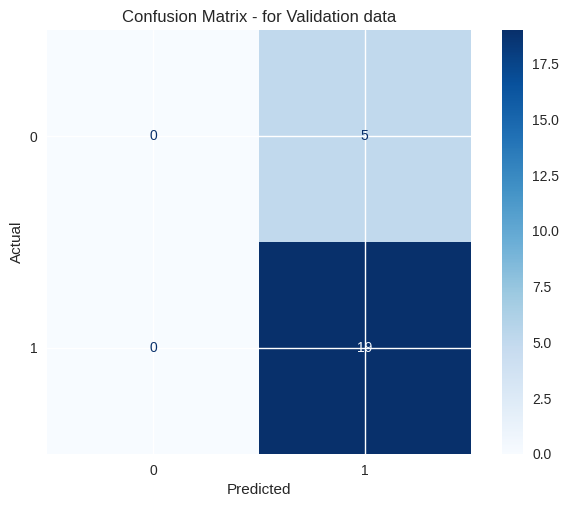

In [172]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_val,pred_y_val, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Validation data')
plt.show()

['1000.0', '100.0', '10.0', '1.0', '0.1', '0.01']


<ipython-input-173-d0b0141ce0e4>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lambda_) #


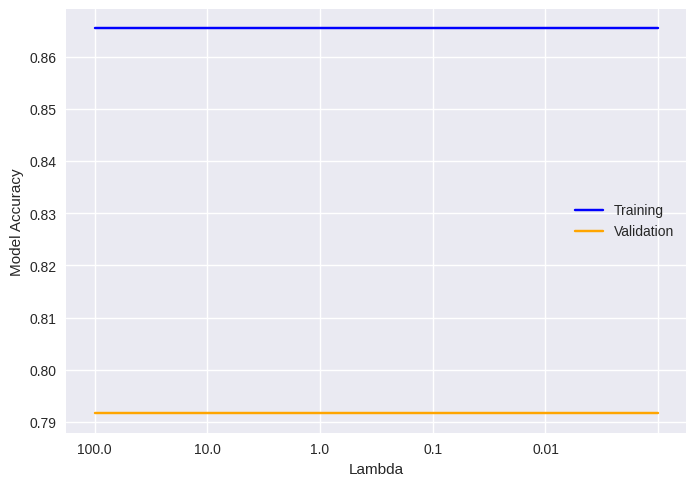

In [173]:
#Tuning Hyperparameters

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
# C_values= np.linspace(0.01,10,100)
lambda_ = [str(1/i) for i in C_values]
print(lambda_)
train_acc, val_acc, test_acc = [], [], []

for c in C_values:
    # where lambda = 1/c
    sclf = svm.SVC(C = c, random_state = 1)
    sclf.fit(x_train,y_train)


    y_pred_train = sclf.predict(x_train)
    y_pred_valid = sclf.predict(x_val)
    y_pred_test = sclf.predict(x_test)

    # accuracy
    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_val, y_pred_valid))
    test_acc.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.xlabel("Lambda")
plt.ylabel("Model Accuracy")
plt.plot(np.array(train_acc), color='blue', label='Training')
plt.plot(np.array(val_acc), color='orange', label='Validation')


plt.legend()
ax.set_xticklabels(lambda_) #
plt.show()

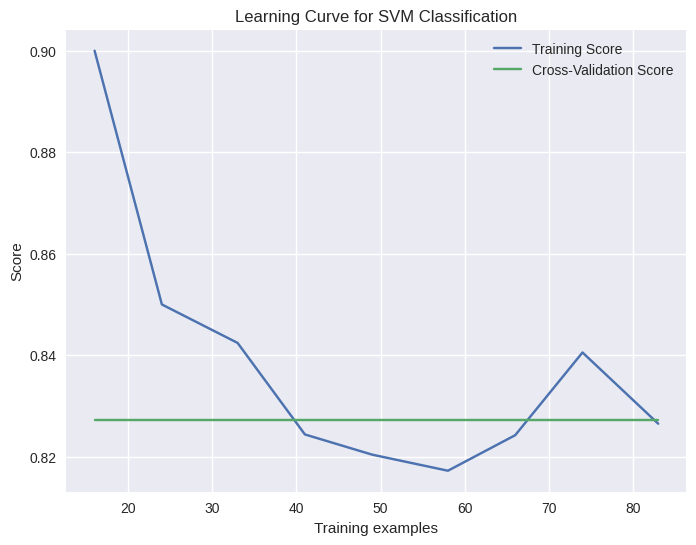

In [174]:
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for SVM Classification')
plt.legend(loc='best')
plt.show()

In [175]:
grid_select={"C":[0.001, 0.01, 0.1, 1, 10, 100], 'degree':[1,2,3, 4, 5, 6]}
svm_clf = svm.SVC()
svm_cv = GridSearchCV(svm_clf, param_grid=grid_select, cv=5, scoring='accuracy', verbose=True, n_jobs=-1)

fine_classifier = svm_cv.fit(x_val, y_val)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [176]:
# Best hyperparameter
print("Best hpyerparameters :(best parameters) ",fine_classifier.best_params_)
print("accuracy :",fine_classifier.best_score_)

Best hpyerparameters :(best parameters)  {'C': 0.001, 'degree': 1}
accuracy : 0.79


# **Classification usingNeural Network**

In [177]:
nn_clf  = MLPClassifier()
nn_clf.fit(x_train, y_train)
pred_nn_clf = nn_clf.predict(x_test)

In [178]:
print(classification_report(y_test, pred_nn_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.79      1.00      0.88        22

    accuracy                           0.79        28
   macro avg       0.39      0.50      0.44        28
weighted avg       0.62      0.79      0.69        28



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
print('Validation acuracy',accuracy_score(y_val, nn_clf.predict(x_val)))
print('test acuracy',accuracy_score(y_test, pred_nn_clf))

Validation acuracy 0.7916666666666666
test acuracy 0.7857142857142857


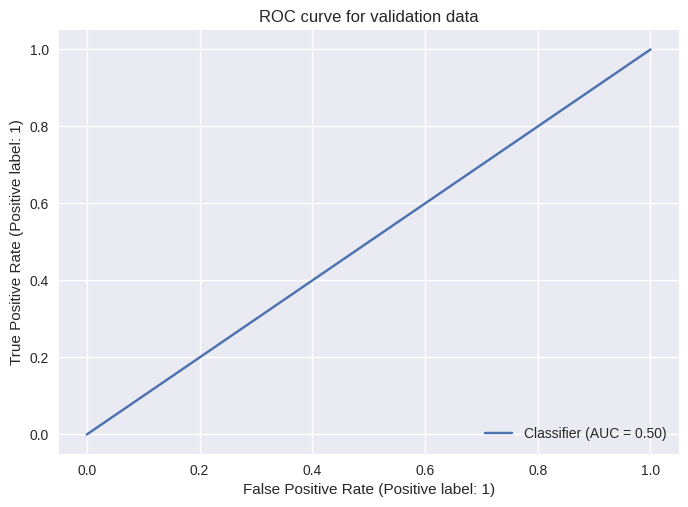

In [180]:
RocCurveDisplay.from_predictions(y_val, nn_clf.predict(x_val))
plt.title('ROC curve for validation data')
plt.show()

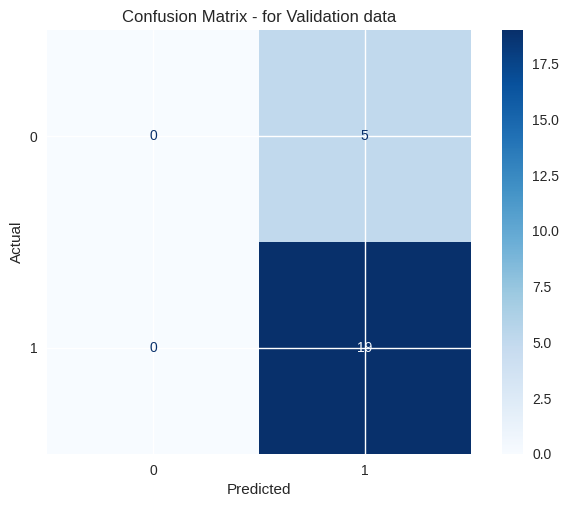

In [181]:
confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_val, nn_clf.predict(x_val), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - for Validation data')
plt.show()

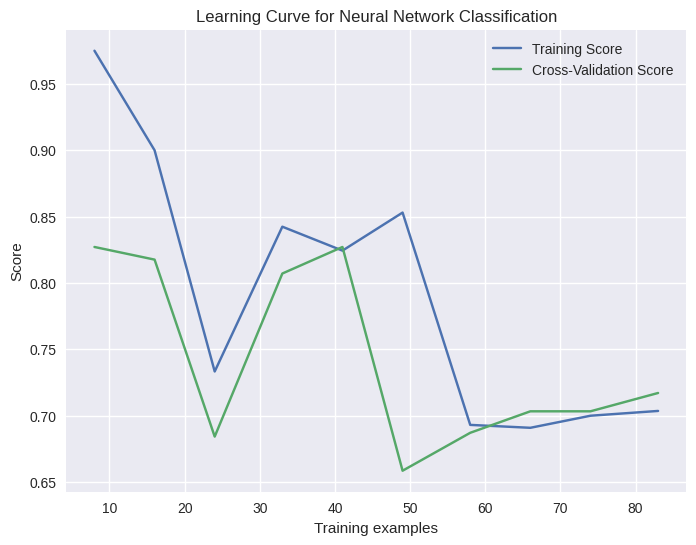

In [182]:
train_sizes, train_scores, test_scores = learning_curve(nn_clf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1),  label='Cross-Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Neural Network Classification')
plt.legend(loc='best')
plt.show()

In [183]:
parameters_ = {
    'hidden_layer_sizes': [(10,30,10),(10,20,10),(20,15,10),(10,10,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
}
#grid search in validation data
classifier_ = GridSearchCV(nn_clf, parameters_, n_jobs=-1, cv=5, verbose=True)
best = classifier_.fit(x_val, y_val)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [ ]:
print('Best Parameters:\n', classifier_.best_params_)
print("accuracy :", best.best_score_)

Best Parameters:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
accuracy : 1.0


# **ROC Curve comparision**

The best params form grid search are considered here

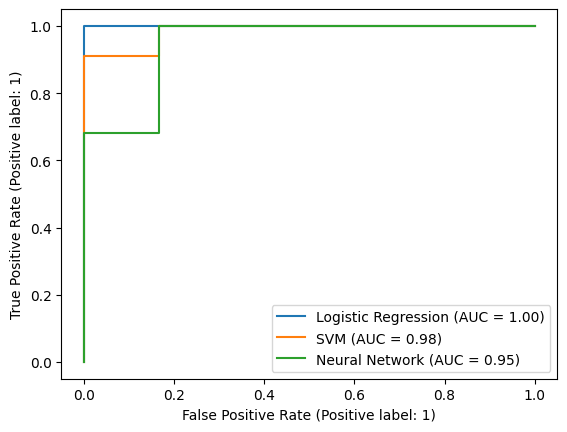

In [ ]:
svm_clf = svm.SVC(C=1,degree=1)
lr_clf = LogisticRegression(C=0.01)

nn_clf = MLPClassifier(hidden_layer_sizes=(10, 30, 10),alpha=0.05,activation='tanh',learning_rate='constant',solver='adam', max_iter=1000)
lr_clf.fit(x_train, y_train)
svm_clf.fit(x_train, y_train)
nn_clf.fit(x_train, y_train)

display = RocCurveDisplay.from_estimator(lr_clf, x_test,y_test,name="Logistic Regression")
RocCurveDisplay.from_estimator(svm_clf,x_test,y_test, ax= display.ax_, name="SVM");
RocCurveDisplay.from_estimator(nn_clf,x_test,y_test, ax= display.ax_,name="Neural Network");

